<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.875713,79.921078,-0.040994,151.755797,151.977164,-0.221368
1,0.0,1.0,68.663703,66.045349,-0.870040,143.839012,144.765011,-0.925998
2,0.0,2.0,21.071655,68.659935,-0.341856,99.389734,99.797053,-0.407319
3,0.0,3.0,43.844790,78.255402,0.272977,132.373169,132.259958,0.113211
4,0.0,4.0,37.606052,48.352160,-1.505562,94.452651,95.843575,-1.390925
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,46.884186,84.389786,-1.150052,140.123920,141.140847,-1.016927
29996,999.0,26.0,82.498172,54.958596,0.668731,148.125499,147.447212,0.678287
29997,999.0,27.0,39.545015,80.575288,-0.854199,129.266104,129.962280,-0.696176
29998,999.0,28.0,58.576661,46.412209,-0.420933,114.567937,114.897940,-0.330003


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    61.875713  79.921078 -0.040994  151.755797  151.977164 -0.221368
      1.0    68.663703  66.045349 -0.870040  143.839012  144.765011 -0.925998
      2.0    21.071655  68.659935 -0.341856   99.389734   99.797053 -0.407319
      3.0    43.844790  78.255402  0.272977  132.373169  132.259958  0.113211
      4.0    37.606052  48.352160 -1.505562   94.452651   95.843575 -1.390925
...                ...        ...       ...         ...         ...       ...
999.0 25.0   46.884186  84.389786 -1.150052  140.123920  141.140847 -1.016927
      26.0   82.498172  54.958596  0.668731  148.125499  147.447212  0.678287
      27.0   39.545015  80.575288 -0.854199  129.266104  129.962280 -0.696176
      28.0   58.576661  46.412209 -0.420933  114.567937  114.897940 -0.330003
      29.0   32.560819  65.487980 -0.913084  107.135714  107.867740 -0.732026

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    61.875713  79.921078 -0.040994  151.755797  151.977164 -0.221368
      1.0    68.663703  66.045349 -0.870040  143.839012  144.765011 -0.925998
      2.0    21.071655  68.659935 -0.341856   99.389734   99.797053 -0.407319
      3.0    43.844790  78.255402  0.272977  132.373169  132.259958  0.113211
      4.0    37.606052  48.352160 -1.505562   94.452651   95.843575 -1.390925
...                ...        ...       ...         ...         ...       ...
999.0 25.0   46.884186  84.389786 -1.150052  140.123920  141.140847 -1.016927
      26.0   82.498172  54.958596  0.668731  148.125499  147.447212  0.678287
      27.0   39.545015  80.575288 -0.854199  129.266104  129.962280 -0.696176
      28.0   58.576661  46.412209 -0.420933  114.567937  114.897940 -0.330003
      29.0   32.560819  65.487980 -0.913084  107.135714  107.867740 -0.732026

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.875713,79.921078,-0.040994,151.755797,151.977164,-0.221368
1,0.0,1.0,68.663703,66.045349,-0.870040,143.839012,144.765011,-0.925998
2,0.0,2.0,21.071655,68.659935,-0.341856,99.389734,99.797053,-0.407319
3,0.0,3.0,43.844790,78.255402,0.272977,132.373169,132.259958,0.113211
4,0.0,4.0,37.606052,48.352160,-1.505562,94.452651,95.843575,-1.390925
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,46.884186,84.389786,-1.150052,140.123920,141.140847,-1.016927
29996,999.0,26.0,82.498172,54.958596,0.668731,148.125499,147.447212,0.678287
29997,999.0,27.0,39.545015,80.575288,-0.854199,129.266104,129.962280,-0.696176
29998,999.0,28.0,58.576661,46.412209,-0.420933,114.567937,114.897940,-0.330003


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    61.875713  79.921078 -0.040994  151.755797  151.977164 -0.221368
      1.0    68.663703  66.045349 -0.870040  143.839012  144.765011 -0.925998
      2.0    21.071655  68.659935 -0.341856   99.389734   99.797053 -0.407319
      3.0    43.844790  78.255402  0.272977  132.373169  132.259958  0.113211
      4.0    37.606052  48.352160 -1.505562   94.452651   95.843575 -1.390925
...                ...        ...       ...         ...         ...       ...
999.0 25.0   46.884186  84.389786 -1.150052  140.123920  141.140847 -1.016927
      26.0   82.498172  54.958596  0.668731  148.125499  147.447212  0.678287
      27.0   39.545015  80.575288 -0.854199  129.266104  129.962280 -0.696176
      28.0   58.576661  46.412209 -0.420933  114.567937  114.897940 -0.330003
      29.0   32.560819  65.487980 -0.913084  107.135714  107.867740 -0.732026

[30000 rows x 6 columns]

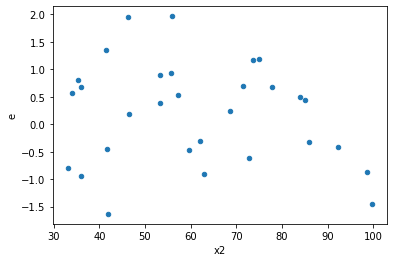

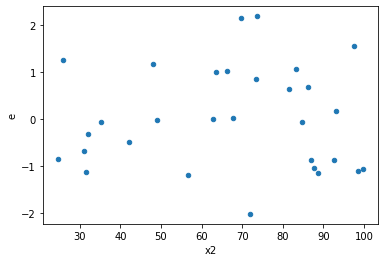

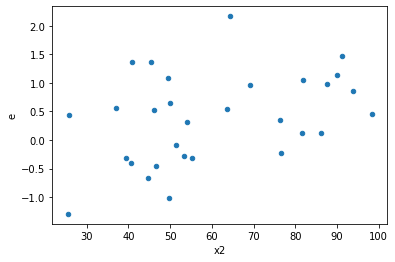

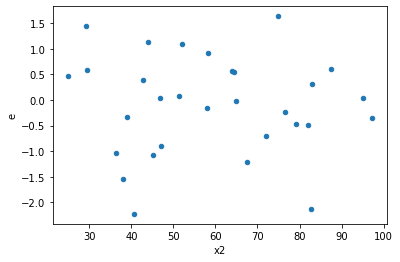

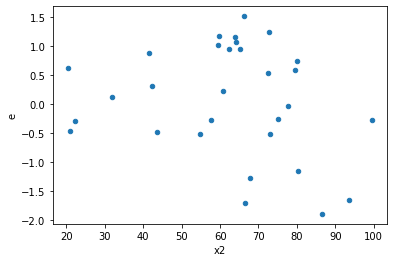

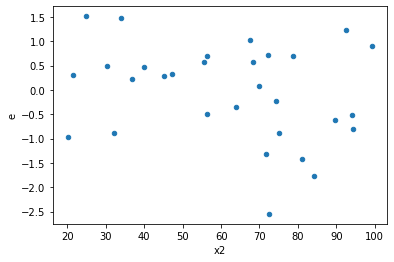

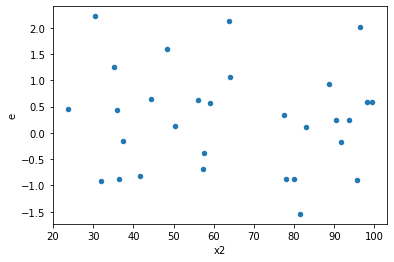

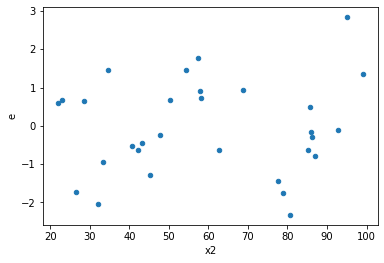

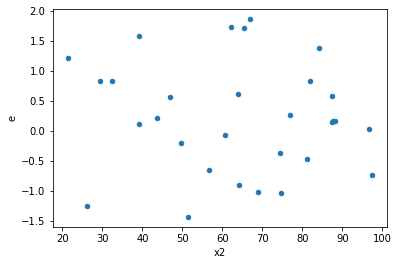

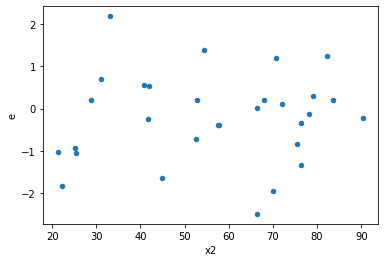

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,11.0,15.0,4.343989894578524,10.425451945641454,0.39490817223441127,0.6950301297094302,1.7599791003992475,0.3055598894007816,0.8472200552996092,0.1527799447003908,Reject005=1 : Homoscedasticity
3.0,11.0,15.0,6.20378916191547,20.69117257162893,0.5639808329014063,1.379411504775262,2.4458481996256194,0.10915594666233153,0.9454220266688342,0.05457797333116576,Reject005=1 : Homoscedasticity
4.0,19.0,7.0,18.120975121251323,9.420894933699165,0.953735532697438,1.345842133385595,1.4111271806966936,0.6692987253382534,0.6653506373308733,0.3346493626691267,Reject005=1 : Homoscedasticity
9.0,13.0,13.0,11.469567017892874,17.257102174122092,0.8822743859917596,1.3274693980093917,1.5045992710274492,0.4715074697611983,0.7642462651194009,0.23575373488059914,Reject005=1 : Homoscedasticity
10.0,6.0,20.0,1.872391403315136,18.227129424388135,0.312065233885856,0.9113564712194068,2.920403724154525,0.06538983876664561,0.9673050806166772,0.03269491938332281,Reject005=1 : Homoscedasticity
11.0,12.0,14.0,8.783652098364302,10.441571565160375,0.7319710081970251,0.7458265403685982,1.0189290723490563,0.9621270451404877,0.5189364774297561,0.4810635225702439,Reject005=1 : Homoscedasticity
13.0,15.0,11.0,10.289155112660541,15.879696562683243,0.6859436741773695,1.4436087784257494,2.1045587746793113,0.21726600239747107,0.8913669988012645,0.10863300119873553,Reject005=1 : Homoscedasticity
15.0,17.0,9.0,13.455474475304818,11.536421408718025,0.7914984985473422,1.2818246009686696,1.619490881310875,0.46685421062661425,0.7665728946866929,0.23342710531330713,Reject005=1 : Homoscedasticity
16.0,10.0,16.0,8.857256240154836,17.319551062211055,0.8857256240154836,1.082471941388191,1.2221300954134617,0.6952651404954342,0.6523674297522829,0.3476325702477171,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,13.0,15.11851077167816,6.0768205714324965,1.1629623670521663,0.4674477362640382,0.4019457116646924,0.11280332731144778,Reject005=1 : Homoscedasticity
1.0,11.0,15.0,4.343989894578524,10.425451945641454,0.39490817223441127,0.6950301297094302,1.7599791003992475,0.3055598894007816,Reject005=1 : Homoscedasticity
2.0,14.0,12.0,12.627954253020171,3.654825243367749,0.9019967323585837,0.3045687702806457,0.3376606137854235,0.05610810134629905,Reject005=1 : Homoscedasticity
3.0,11.0,15.0,6.20378916191547,20.69117257162893,0.5639808329014063,1.379411504775262,2.4458481996256194,0.10915594666233153,Reject005=1 : Homoscedasticity
4.0,19.0,7.0,18.120975121251323,9.420894933699165,0.953735532697438,1.345842133385595,1.4111271806966936,0.6692987253382534,Reject005=1 : Homoscedasticity
5.0,17.0,9.0,25.120561006170284,1.4497372734785348,1.4776800591864874,0.16108191927539275,0.10901001084366921,0.00011557250151028324,Reject005=0 : Heteroscedasticity
6.0,14.0,12.0,20.589133910691864,14.843032018591952,1.4706524221922759,1.2369193348826626,0.8410684375297928,0.7489157250908169,Reject005=1 : Homoscedasticity
7.0,16.0,10.0,18.774569554421937,5.5643102086988465,1.173410597151371,0.5564310208698846,0.4741997577154184,0.17693282880963082,Reject005=1 : Homoscedasticity
8.0,19.0,7.0,18.79500796308024,2.3635010307568916,0.9892109454252759,0.33764300439384165,0.34132558475551855,0.05881151004511523,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      904
Reject005=0 : Heteroscedasticity     96
Name: Result_test, dtype: int64